### Based on a [seminal talk](https://www.youtube.com/watch?v=f1vXAHGIpfc) by Ole Peters, I illustrate the fundamental difference between an ergodic and non-ergodic process using a simple coin game.  

(_If you download this notebook, you can use the interactive widgets to explore this yourself_) 

---

### Why is this important/exciting:

In the talk I've linked to above, Ole Peters does a very good job at revisiting the properties of a mathmatical quantity (the ensemble average, or expectation operator) in the light of a novel understanding of dynamics. This question is fundamentally the same that motivated the [St. Petersbrug Paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox) and Daniel Bernoullis formulation of expected utility, that still lies as the foundation of all modern macro and micro economics.  

In the following I will illustrate the essence of Peters talk, using a very simple coin game. The question we're trying to answer is: _Is this gamble worth taking?_. 

### Dynamics: 

* At each time step a **fair coin** is flipped and lands either heads or tails.
* For **heads** wealth **increases with 50%** e.g. $$W_t\cdot1.5$$
* For **tails** wealth **decreases by 40%** e.g. $$W_t\cdot0.6$$

### Nonclamenture:

* $$W_t$$ is the wealth at time $$t$$ (<code>W_</code>)
* $$\mathbb{E}$$ is the large-N limit expectation average (<code>E_</code>)
* $$\mathcal{A}$$ is the the long-time average (<code>A_</code>)
* $$\mu$$ is the emperical mean (<code>mu</code>)

---

### Simulations:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

sns.set(style="white", palette="deep", color_codes=True)

%matplotlib inline
    

In [25]:
def multiplicativeW(T, N, W, E, A, mu):
    
    w0 = 1 # start wealth
    c1 = 0.5 # multiplicative factor at win
    c2 = -0.4 # multiplicative factor at loss
    
    np.random.seed(1) # seeds numpy
    
    # preallocate
    c_ = np.empty((N,T)) 
    W_ = np.empty((N,T)) 
    mu_ = np.empty((T)) 
    E_ = np.empty((T))
    A_ = np.empty((T))
    
    for j in range(N):
        
        W_[j,0] = w0
        mu_[0] = w0

        for k in range(1,T):

            # coin dynamics 
            c_ = np.random.choice([c1,c2])

            # wealth dynamics
            W_[j,k] = W_[j,k-1] * (1+c_)
            
            # empirical mean
            mu_[k] = np.mean(W_[:,k]) # finite ensemble mean

    # theoretical constants
    E_[0:T] = np.power(1+((0.5*c1)+(0.5*c2)),np.arange(0,T)) # expectation operator
    A_[0:T] = np.power(np.exp((np.log(1+c1)+np.log(1+c2))/2),np.arange(0,T)) # finite time-average
                
    # plotting
    fig = plt.figure(figsize=(12,5))
    plt.yscale('log', nonposy='clip')
    
    NUM_COLORS = N
    cm = sns.cubehelix_palette(8, start=10, rot=-.75,as_cmap = True)
    
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    
    if W is True:
    
        for j in range(N):
            ax1.plot(W_[j],linewidth = 1)
        
    if E is True:    
        ax1.plot(E_,linewidth = 2,color='k',label = (r'$\mathbb{E}$'))
        plt.legend(loc='upper left', fontsize=14)
        
    if A is True:
        ax1.plot(A_,linewidth = 2,color='r', label = (r'$\mathcal{A}$'))
        plt.legend(loc='upper left', fontsize=14)
        
    if mu is True:
        ax1.plot(mu_,linewidth = 2,color='r', label = (r'$\mu$'))
        plt.legend(loc='upper left', fontsize=14)
        

First, let's assume that we play the coin game once every minute for an hour and plot just one ($$N=1$$) trajectory of the dynamic outlined above for $$T=60$$ time periods. 

<function __main__.multiplicativeW>

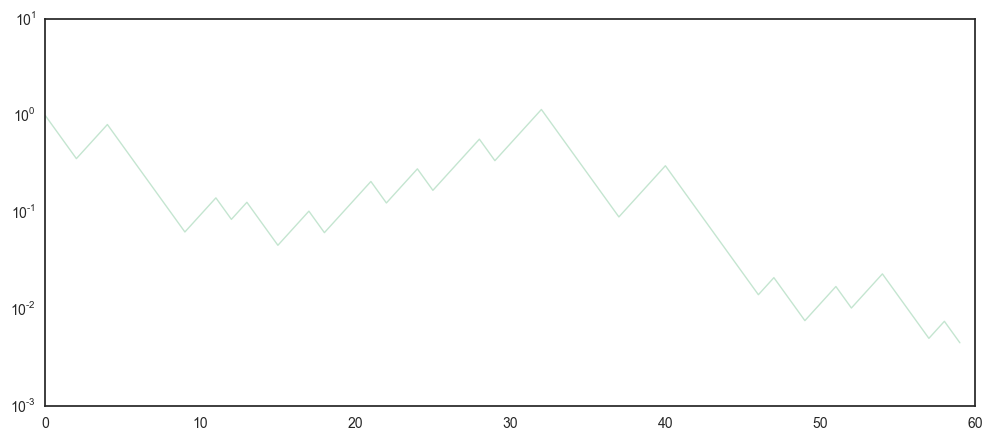

In [26]:
interact(multiplicativeW, T = 60, N = 1, W = True, E = False, A = False, mu = False)

Its clear that this process got close to zero $$(10^{-2})$$ quite quickly (after 50 flips). However, it's also quite noisy and difficult to make out, if this one trajectory was just a bit unfortunate. Lets _repeat_ the game 100 times $$(N=100)$$ and see what happens.

<function __main__.multiplicativeW>

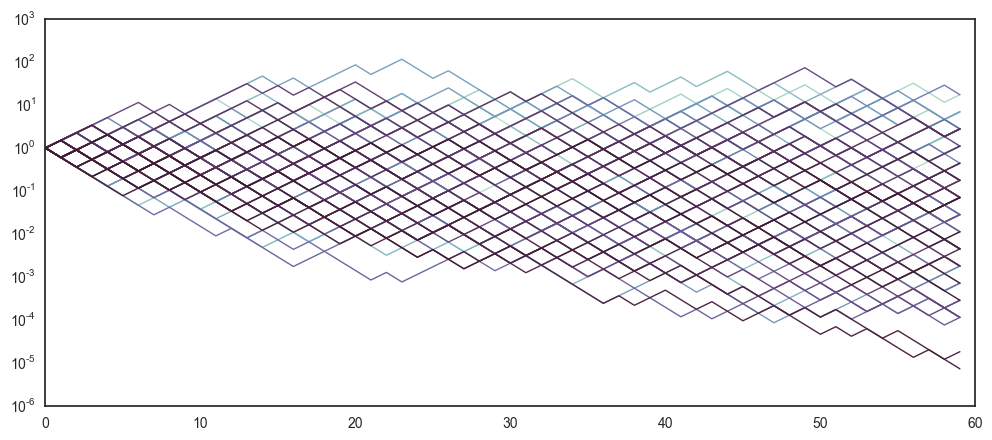

In [27]:
interact(multiplicativeW, T = 60, N = 100, W = True, E = False, A = False, mu = False)

We're still not getting much smarter. Looks like half on the trajectories are increasing, while the other half are dereasing - but it remains difficult to tell if this game is really beneficial. 

To get rid of some of the noise, let's try to average the 100 different trajectories.

<function __main__.multiplicativeW>

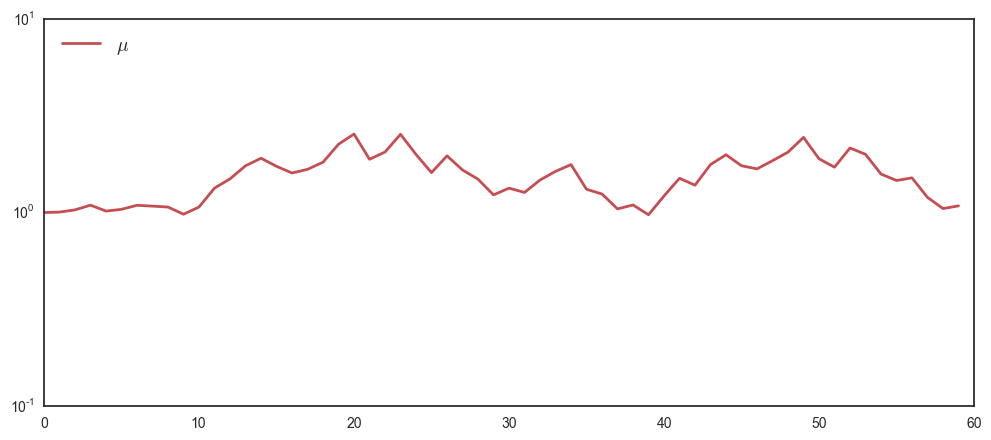

In [28]:
interact(multiplicativeW, T = 60, N = 100, W = False, E = False, A = False, mu = True)

Which looks noisy around zero. To reduce the noise in the average, increase the number of plays to a large number, say $$N=10000$$.

<function __main__.multiplicativeW>

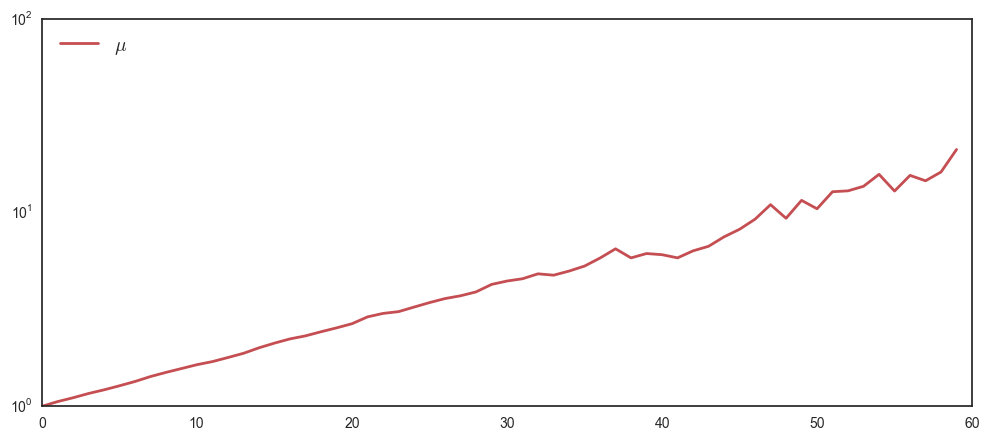

In [29]:
interact(multiplicativeW, T = 60, N = 10000, W = False, E = False, A = False, mu = True)

It seems like the empirical average <span style="color:red">$$\mu$$</span> steadily increases. If you feel like removing more noise, you can increase $$N$$ (however this script is quite slow due to all the _for-loops_). 

---

As we have explicit knowledge of the dynamics, we can do much better than simulations. We can simply calculate the mean or _expectation operator_ $$\mathbb{E}(\cdot)$$ over the $$N$$ trajectories. Formally, the expectation operator is the _large-N_ limit of the empirical mean 

$$
\underset{N\rightarrow\infty}{\mbox{lim}}\left\langle W\right\rangle _{N}=\frac{1}{N}\sum_{i=1}^{N}W_i(t)
$$

where $$\left\langle W\right\rangle _{N}$$ denotes the average over *N*, as *N* goes to infinity. We denote this $$\mathbb{E}$$.

Let's calculate this. By using our knowledge that as $$N\rightarrow\infty$$ the probability of a fair coin asymptotes to the same ratio. This means we can calculate $$\mathbb{E}$$ as $$\frac12\times0.6+\frac12\times1.5=1.05$$ which is a number larger than one, reflecting positive growth of the _ensemble_ of trajectories. 

Below is a graphical result of the expectation operator $$\mathbb{E}$$ and the empirical mean ($$\mu$$ for a finite *N*).

<function __main__.multiplicativeW>

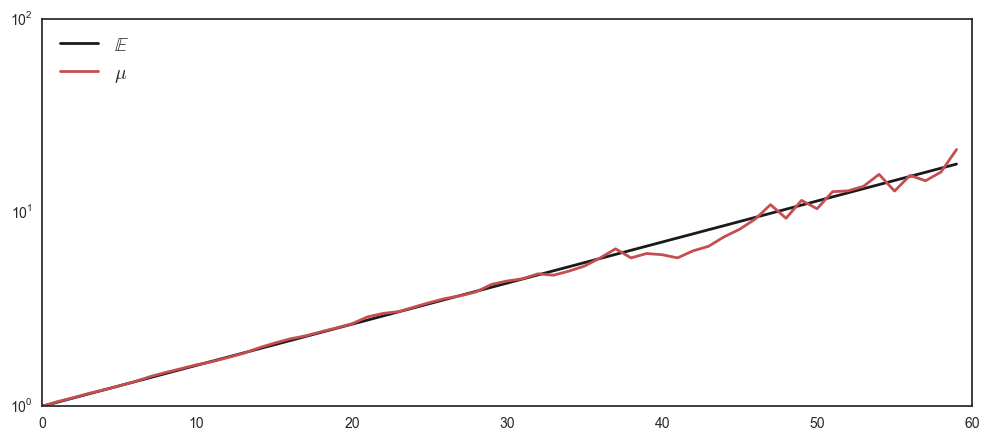

In [30]:
interact(multiplicativeW, T = 60, N = 10000, W = False, E = True, A = False, mu = True)

The graph supports our theoretical analysis: The empirical mean seems to asymptote to the large-N limit mean, which grows exponentially towards infinity. 

The conclusion is simple: Since this process has a positive expectation it will simply grow exponentially towards infinity, which means that you (or anyone rational) should be willing to pay _any_ ticket price _P_ for playing this gamble.

Sounds too good to be true? Well, thats because it is too good to be true. To understand why, we must first consider the _time-perspective_. 

---

### The time-perspective

To convince ourselves about this, lets plot one 'person' $$N=1$$ playing the game for $$T=10000$$ trials and contrast this to the expectation operator $$\mathbb{E}$$. 

<function __main__.multiplicativeW>

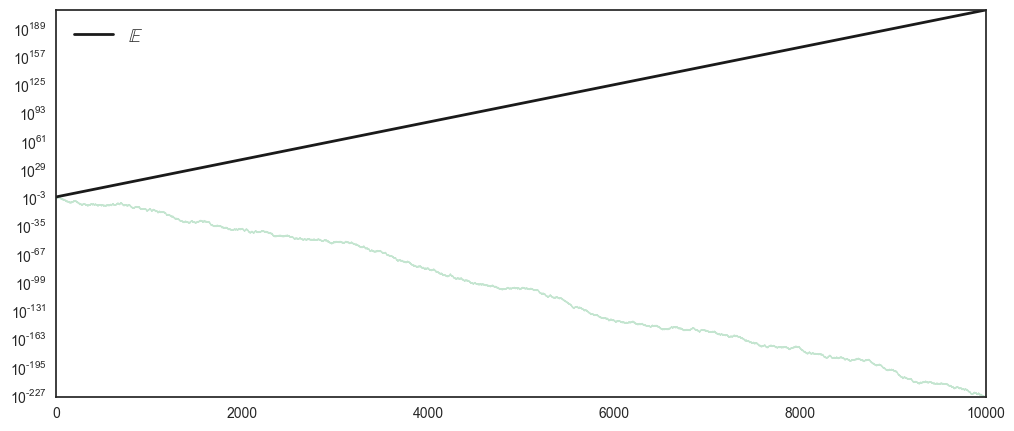

In [31]:
interact(multiplicativeW, T = 10000, N = 1, W = True, E = True, A = False, mu = False)

This single trajectory is quite a different scenario from what the theoretical prediction. While the expectation operator goes to $$10^{189}$$ (which is a very, very large number), the realised trajectory ends up at $$10^{-227}$$.

Let's try to convince ourselves that this was just one unlucky trajectory. Again, we wish to remove noise, and we do so by increasing the number of players, playing $$T=10000$$ to $$N=100$$.

<function __main__.multiplicativeW>

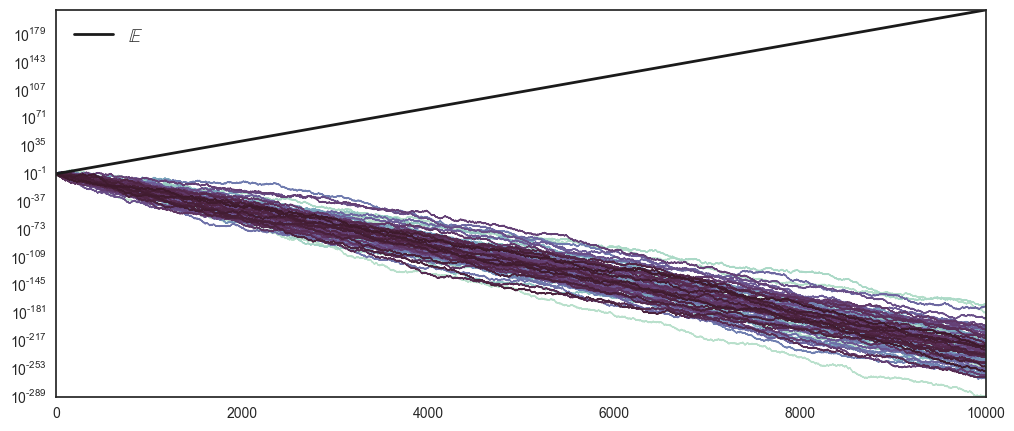

In [32]:
interact(multiplicativeW, T = 10000, N = 100, W = True, E = True, A = False, mu = False)

Immediatly there seems to be a fundamental difference between the theoretical prediction $$\mathbb{E}(\cdot)$$ and the hundred realised trajectories. 
 
Lets consider the definition of the finite-time time-average 

$$
\left\langle W(t)\right\rangle _{T} = \frac{1}{T}\sum_{t=0}^{T}W(t)
$$

which we will denote $$\mathcal{A}$$.

where $$\left\langle W(t)\right\rangle _{T}$$ denotes the average of a single process over time $$T$$. This quantity evolves over time as shown in the figure below. Similar to the above, taking the *time-limit* of this gives us the theoretical time-average 

$$
\underset{T\rightarrow\infty}{\mbox{lim}}\left\langle W(t)\right\rangle _{T} = \frac{1}{T}\sum_{t=0}^{T}W(t)
$$

If we calculate this for the above dynamics, we will realise that it asymptotes to zero. The calculation is easy $$\sqrt{1.5\cdot0.6}\approx0.95$$, a number less than one, indicating negative asymptotic growth. 

---


Thus we have the two fundamental results that in the above scenario

$$
\underset{T\rightarrow\infty}{\mbox{lim}}\left\langle W(t)\right\rangle _{T} \rightarrow 0
$$

$$
\underset{N\rightarrow\infty}{\mbox{lim}}\left\langle W\right\rangle _{N} \rightarrow \infty
$$


This difference can be explained by considering a rough definition of ergodicity:

 > _**A process is non-ergodic if the time-average does not equal the ensemble-average.**_

That, formally can be expressed as

$$ 
\underset{T\rightarrow\infty}{\mbox{lim}}\left\langle W(t)\right\rangle _{T} \neq \underset{N\rightarrow\infty}{\mbox{lim}}\left\langle W\right\rangle _{N} 
$$

Plotting the finite ensemble and time-average will hints towards this difference being palpable in finite time as $$\mathcal{A}$$ goes to zero, while $$\mathbb{E}$$ goes towards infinity. 

<function __main__.multiplicativeW>

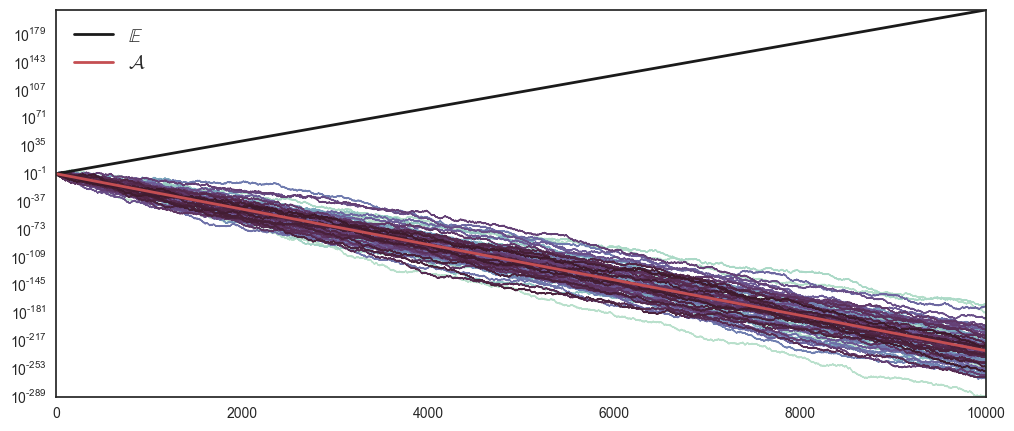

In [34]:
interact(multiplicativeW, T = 10000, N = 100, W = True, E = True, A = True, mu = False)

There's much more to this story, and if you find it compellin, I suggest you see the video in the introduction, or read the follow papers:

1) [The time resolution of the St Petersburg paradox](http://rsta.royalsocietypublishing.org/content/roypta/369/1956/4913.full.pdf)

2) [Evaluating Gambles Using Dynamics](http://samoa.santafe.edu/media/workingpapers/14-05-013.pdf)